In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<function dir>

In [6]:
data = pd.read_csv('train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

## 1 задание

In [3]:
data['Sub-Category'].value_counts()[:4]

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: count, dtype: int64

In [4]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

C:\Users\kirillwin\AppData\Local\Temp\ipykernel_11736\3021409918.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


In [5]:
data[data['Order Date'] >= '2016-12-30']['Sub-Category'].value_counts()[:4]

Sub-Category
Binders        907
Paper          810
Furnishings    558
Phones         511
Name: count, dtype: int64

In [6]:
data[data['Order Date'] >= '2017-12-30']['Sub-Category'].value_counts()[:4]

Sub-Category
Binders        496
Paper          454
Furnishings    310
Phones         291
Name: count, dtype: int64

In [7]:
#дополнительно
data[(data['Order Date'] >= '2016-12-30') & (data['Order Date'] < '2017-12-30')]['Sub-Category'].value_counts()[:4]
#2017 Binders   496
#2016 Binders   411
#496/411 = 1,206

Sub-Category
Binders        411
Paper          356
Furnishings    248
Phones         220
Name: count, dtype: int64

### Можно заметить, что спрос на товары немного вырос по сравнению с 2016 годом, примерно на 20%

## 2 задание

In [8]:
data['Sales'] = data['Sales'].apply(lambda x: x.replace(',', '.')).astype(float)

{'whiskers': [<matplotlib.lines.Line2D at 0x2429985ff90>,
 'caps': [<matplotlib.lines.Line2D at 0x2429985e890>,
 'boxes': [<matplotlib.lines.Line2D at 0x242998a84d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2429985d090>],
 'fliers': [<matplotlib.lines.Line2D at 0x2429985c5d0>],
 'means': []}

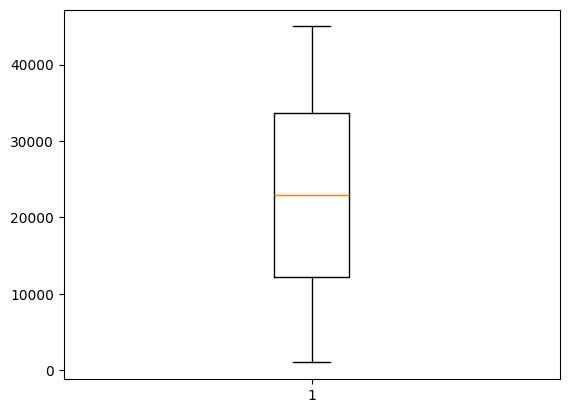

In [9]:
plt.boxplot(data['Sales'])
# длина усов
# X_1 = Q_1 − 1.5( Q_3 − Q_1 )  X_2 = Q_3 + 1.5( Q_3 − Q_1 ) 

In [10]:
data['Sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: Sales, dtype: float64

### Медиана равна 22882, 25 и 75 процентили равны соответственно 12135 и 33730

## 3 задание

<Axes: >

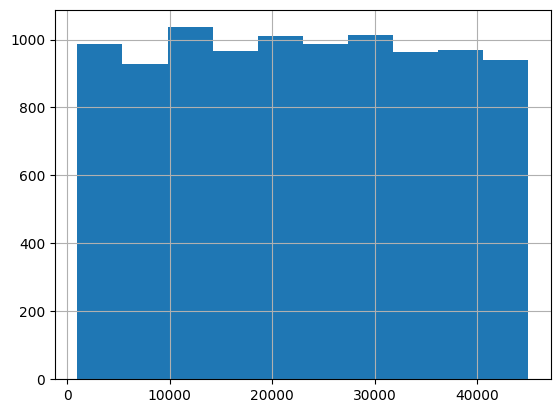

In [11]:
data['Sales'].hist()

### Так как мы имеем равномерное распределение в Sales, то мы можем поделить данные на 3 равные по размеру группы.

In [12]:
sales = sorted(data['Sales'])

In [13]:
sale_group = []
for sale in data['Sales']:
    if sale <=sales[len(sales)//3]:
        sale_group.append(0)
    elif sale < sales[2*len(sales)//3]:
        sale_group.append(1)
    else:
        sale_group.append(2)
data['Sale_group'] = sale_group

In [1]:
data[0]

NameError: name 'data' is not defined

In [14]:
data.groupby(['Region','Sale_group']).agg({'Sales':  ['sum', 'count']})

Sales      
                                 sum count
Region      Sale_group                    
Владивосток 0           7.830757e+06   945
            1           2.030969e+07   884
            2           3.581224e+07   956
Калиниград  0           8.873517e+06  1038
            1           2.515241e+07  1093
            2           3.790437e+07  1009
Москва      0           4.256534e+06   518
            1           1.225589e+07   536
            2           2.037922e+07   544
Урал        0           6.419256e+06   766
            1           1.718101e+07   753
            2           2.825832e+07   758

### Можно заметить, что больше всего продаж по всем группам имеется в Калининграде, соответственно и сумма продаж там самая большая. Меньше всего покупают товары в Москве, что странно, поскольку это самый большой город из представленных, скорее всего необходимо что-то сделать с рекламной компанией или расположить больше точек продажи.

<Axes: >

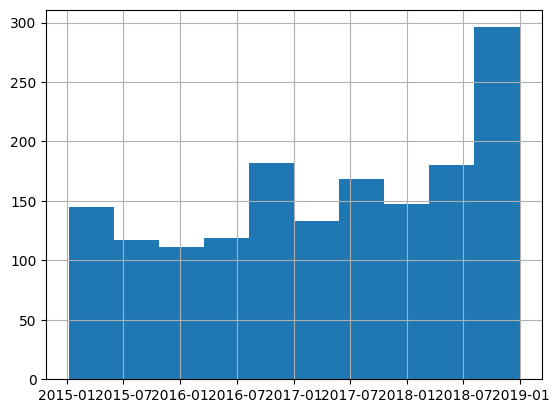

In [15]:
#дополнительно
data[data['Region'] == 'Москва']['Order Date'].hist()

### Здесь можно заметить, что только в последнее время продажи в Москве выросли, так как скорее всего, что-то было изменено в стратегии, поэтому, для того чтобы сохранить такую тенденцию, можно продолжать эту стратегию